# Penalizer

## Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

## Datengrundlage

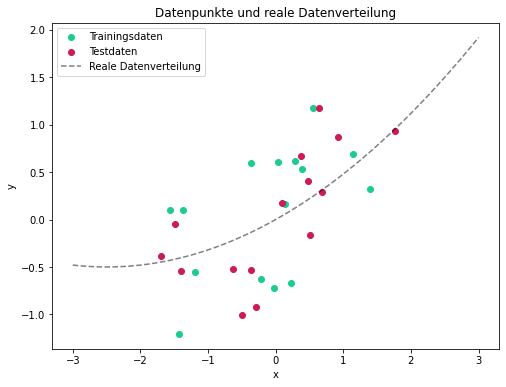

In [2]:
def real_distribution(x):
    return x*0.4+(x**2)*0.08

x_axis = np.linspace(-3,3)

n = 30
x = np.random.normal(0,1,size=n)
y = real_distribution(x)
y = y + np.random.normal(0,0.5,size=n)

x_train, y_train = x[:int(n/2)],y[:int(n/2)]
x_test, y_test = x[int(n/2):],y[int(n/2):]

plt.figure(figsize=(8,6))
plt.title("Datenpunkte und reale Datenverteilung")
plt.scatter(x_train,y_train,label="Trainingsdaten",c="#1ACC94")
plt.scatter(x_test,y_test,label="Testdaten",c="#CC1B58")
plt.plot(x_axis,real_distribution(x_axis),label="Reale Datenverteilung",c="black",ls="--",alpha=0.5)
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Wirkung zu vielen Freiheitsgraden

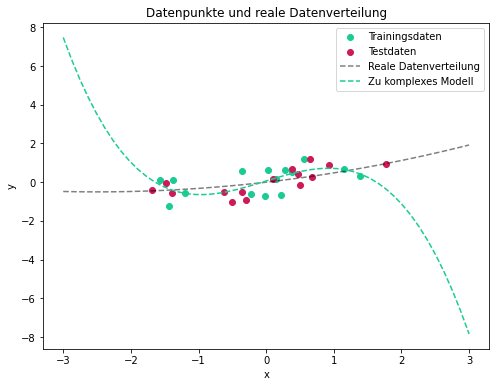

In [3]:
poly = 4
plain = LinearRegression()
x_train_poly = np.concatenate([x_train.reshape(-1,1)**i for i in range(poly)],axis=1)
plain.fit(x_train_poly,y_train)

plt.figure(figsize=(8,6))
plt.title("Datenpunkte und reale Datenverteilung")
plt.scatter(x_train,y_train,label="Trainingsdaten",c="#1ACC94")
plt.scatter(x_test,y_test,label="Testdaten",c="#CC1B58")
plt.plot(x_axis,real_distribution(x_axis),label="Reale Datenverteilung",c="black",ls="--",alpha=0.5)
plt.plot(x_axis,plain.predict(np.concatenate([x_axis.reshape(-1,1)**i for i in range(poly)],axis=1)),label="Zu komplexes Modell",c="#1ACC94",ls="--")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Regularisierung durch L1 (Lasso) und L2 (Ridge) Norm

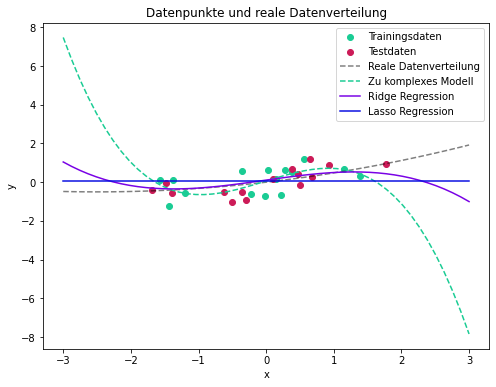

In [4]:
ridge = Ridge(alpha=1)
ridge.fit(x_train_poly,y_train)

lasso = Lasso(alpha=1)
lasso.fit(x_train_poly,y_train)

plt.figure(figsize=(8,6))
plt.title("Datenpunkte und reale Datenverteilung")
plt.scatter(x_train,y_train,label="Trainingsdaten",c="#1ACC94")
plt.scatter(x_test,y_test,label="Testdaten",c="#CC1B58")
plt.plot(x_axis,real_distribution(x_axis),label="Reale Datenverteilung",c="black",ls="--",alpha=0.5)
plt.plot(x_axis,plain.predict(np.concatenate([x_axis.reshape(-1,1)**i for i in range(poly)],axis=1)),label="Zu komplexes Modell",c="#1ACC94",ls="--")
plt.plot(x_axis,ridge.predict(np.concatenate([x_axis.reshape(-1,1)**i for i in range(poly)],axis=1)),label="Ridge Regression",c="#7902E5")
plt.plot(x_axis,lasso.predict(np.concatenate([x_axis.reshape(-1,1)**i for i in range(poly)],axis=1)),label="Lasso Regression",c="#090EE1")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [7]:
import os

data = pd.read_csv(os.path.join('..', '..', '..', '..', 'data', 'mpg.csv'))

y = data["mpg"].to_numpy().reshape(-1, 1)
x = data.drop(["mpg"],axis=1)

scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y)
x_scaled = scaler.fit_transform(x)

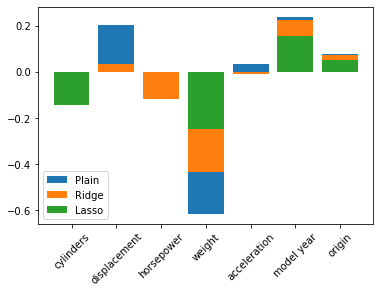

In [8]:
plain = LinearRegression()
plain.fit(x_scaled,y_scaled)

ridge = Ridge()
ridge.fit(x_scaled,y_scaled)

lasso = Lasso(alpha=0.01)
lasso.fit(x_scaled,y_scaled)

plt.bar(list(x.columns),plain.coef_.ravel(),label="Plain")
plt.bar(list(x.columns),ridge.coef_.ravel(),label="Ridge")
plt.bar(list(x.columns),lasso.coef_.ravel(),label="Lasso")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [9]:
lasso.coef_.ravel()

array([-0.14538591, -0.        , -0.        , -0.24949922,  0.        ,
        0.15746049,  0.0516949 ])